# Предварительный анализ

In [43]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import statsmodels.api as sm 
from statsmodels.formula.api import glm

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

from IPython.display import HTML, SVG, display
from graphviz import Source


def print_roc(y_test, predictions):
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

In [44]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [45]:
df.head(10)

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,have_no_problem
0,female,B,bachelor's degree,1,0,1
1,female,C,some college,1,1,1
2,female,B,master's degree,1,0,1
3,male,A,associate's degree,0,0,0
4,male,C,some college,1,0,1
5,female,B,associate's degree,1,0,1
6,female,B,some college,1,1,1
7,male,B,some college,0,0,0
8,male,D,high school,0,1,1
9,female,B,high school,0,0,0


<AxesSubplot:xlabel='test_preparation_course', ylabel='count'>

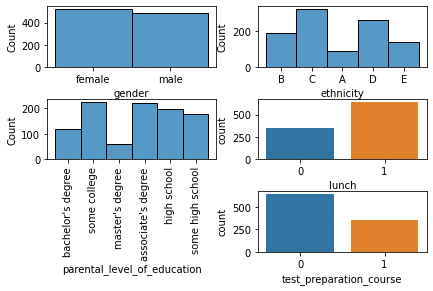

In [46]:
# Отрисовка гистограмм столбцов исходных данных
fig, ax = plt.subplots(3, 2)
fig.tight_layout()
ax[2, 0].axis('off')

sns.histplot(data=df, x='gender', ax=ax[0, 0])
sns.histplot(data=df, x='ethnicity', ax=ax[0, 1])
sns.histplot(data=df, x='parental_level_of_education', ax=ax[1, 0])

ax[1, 0].xaxis.set_visible(True)
for tick in ax[1, 0].get_xticklabels():
    tick.set_rotation(90)

sns.countplot(data=df, x='lunch', ax=ax[1, 1])
sns.countplot(data=df, x='test_preparation_course', ax=ax[2, 1])

In [47]:
# Построение точечного 3D графика для учебных предметов
# fig = px.scatter_3d(df, x='math_score', y='rus_score', z='literature_score',
#               color='have_no_problem', height=600)
# fig

In [48]:
# Построение попарных точечных графиков и гистограмм для отдельных учебных предметов
# ax = sns.pairplot(df[['math_score', 'literature_score', 'rus_score']])
# ax

# Создание и использование моделей

In [49]:
features = np.array(['gender', 'ethnicity', 'lunch', 'test_preparation_course', 'parental_level_of_education'])

In [50]:
X = df[features]
y = df['have_no_problem']

In [51]:
X.head()

,gender,ethnicity,lunch,test_preparation_course,parental_level_of_education
0,female,B,1,0,bachelor's degree
1,female,C,1,1,some college
2,female,B,1,0,master's degree
3,male,A,0,0,associate's degree
4,male,C,1,0,some college


In [52]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: have_no_problem, dtype: int64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

# Логистическая регрессия

In [54]:
log_reg = glm(
    f'have_no_problem ~ {" + ".join(features) if len(features) else "1"}',
    data=pd.concat([X_train, y_train], axis=1),
    family=sm.families.Binomial()).fit()

# Сводная таблица

In [55]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        have_no_problem   No. Observations:                  670
Model:                            GLM   Df Residuals:                      657
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -298.54
Date:                Sat, 27 Mar 2021   Deviance:                       597.08
Time:                        18:09:53   Pearson chi2:                     650.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           -0.0932      0.410     -0.227      0.820      -0.897       0.711
gender[T.male]                                      -0.4913      0.208     -2.364      0.018      -0.899      -0.084
ethnicity[T.B]                                       0.3968      0.377      1.052      0.293      -0.342       1.136
ethnicity[T.C]                                       0.8296      0.362      2.291      0.022       0.120       1.539
ethnicity[T.D]                                       1.2594      0.388      3.250      0.001       0.500       2.019
ethnicity[T.E]                                       0.6987      0.419      1.667      0.095      -0.123       1.520
parental_level_of_education[T.bachelor's degree]     0.8331      0.469      1.777      0.076      -0.086       1.752
parental_level_of_education[T.high school]          -0.4557      0.304     -1.500      0.134      -1.051       0.140
parental_level_of_education[T.master's degree]       0.3363      0.542      0.620      0.535      -0.727       1.400
parental_level_of_education[T.some college]         -0.1194      0.308     -0.387      0.699      -0.724       0.485
parental_level_of_education[T.some high school]     -0.6871      0.316     -2.177      0.029      -1.306      -0.069
lunch                                                1.3719      0.209      6.576      0.000       0.963       1.781
test_preparation_course                              1.0527      0.240      4.395      0.000       0.583       1.522
====================================================================================================================
"""

In [56]:
predictions = log_reg.predict(X_test)

# Выявленные студенты в группе риска

In [57]:
X_test

,gender,ethnicity,lunch,test_preparation_course,parental_level_of_education
568,male,B,0,0,high school
872,male,B,1,1,associate's degree
981,male,D,1,0,some high school
210,male,D,0,1,some high school
425,female,C,0,0,some college
...,...,...,...,...,...
218,male,B,0,0,high school
723,male,C,1,0,high school
422,female,D,0,1,master's degree
892,female,A,0,0,master's degree


In [58]:
students_with_problems = X_test.copy()
students_with_problems['predictions'] = predictions
students_with_problems[students_with_problems.iloc[:,-1] < .5]

,gender,ethnicity,lunch,test_preparation_course,parental_level_of_education,predictions
568,male,B,0,0,high school,0.344463
157,male,B,0,0,some college,0.423813
25,male,A,0,0,master's degree,0.438261
830,female,A,0,0,some college,0.447041
3,male,A,0,0,associate's degree,0.357896
301,male,D,0,0,some high school,0.496948
444,male,A,0,0,some high school,0.218988
228,male,A,0,0,some high school,0.218988
731,male,A,0,0,some high school,0.218988
882,female,B,0,0,high school,0.462025


# Метрики качества модели

In [59]:
print(classification_report(y_test, round(predictions)))

              precision    recall  f1-score   support

           0       0.35      0.11      0.17        64
           1       0.82      0.95      0.88       266

    accuracy                           0.79       330
   macro avg       0.58      0.53      0.52       330
weighted avg       0.73      0.79      0.74       330



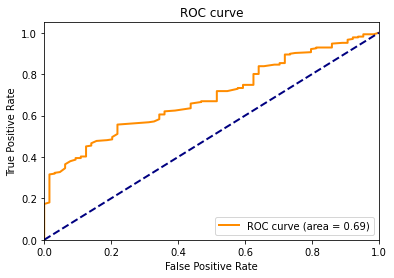

In [60]:
print_roc(y_test, predictions)

# Дерево решений

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree

from sklearn.model_selection import GridSearchCV

In [62]:
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

In [63]:
#dt = DecisionTreeClassifier()
# parameters = {
#     'criterion': ['entropy', 'gini'],
#     'max_depth': range(1, 10),
#     'min_samples_split': range(2, 50),
#     'min_samples_leaf': range(1, 50),
# }

# search = GridSearchCV(dt, parameters,
#                       cv=5,
#                       n_jobs=-1).fit(X_train, y_train)
# search.best_params_

In [64]:
#best_tree = search.best_estimator_

In [65]:
best_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_leaf=1,
    min_samples_split=2
)

In [66]:
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

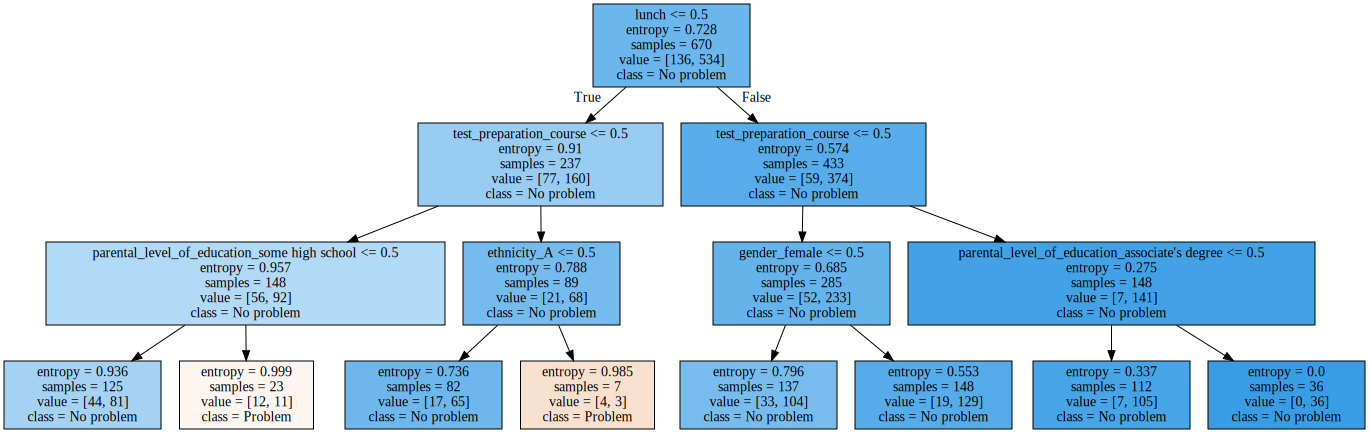

In [67]:
graph = Source(tree.export_graphviz(
    best_tree,
    out_file=None,
    feature_names=list(X),
    class_names=['Problem', 'No problem'],
    filled=True
))

display(SVG(graph.pipe(format='svg')))

In [68]:
feature_importances = best_tree.feature_importances_
feature_importances_df = pd.DataFrame({
    'feature_importances': feature_importances,
    'features': list(X_train)
})
feature_importances_df.sort_values('feature_importances', ascending=False)

,feature_importances,features
0,0.452332,lunch
1,0.318884,test_preparation_course
2,0.084810,gender_female
9,0.055979,parental_level_of_education_associate's degree
4,0.055682,ethnicity_A
14,0.032312,parental_level_of_education_some high school
3,0.000000,gender_male
5,0.000000,ethnicity_B
6,0.000000,ethnicity_C
7,0.000000,ethnicity_D


In [69]:
predictions = best_tree.predict_proba(X_test)[:, 1]

In [70]:
print(classification_report(y_test, predictions.round()))

              precision    recall  f1-score   support

           0       0.56      0.14      0.22        72
           1       0.80      0.97      0.88       258

    accuracy                           0.79       330
   macro avg       0.68      0.55      0.55       330
weighted avg       0.75      0.79      0.73       330



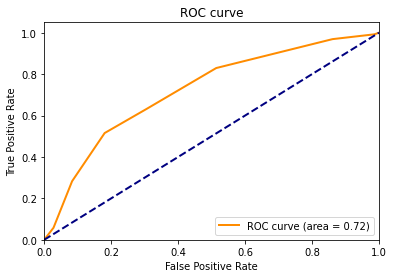

In [71]:
print_roc(y_test, predictions)

# Случайный лес

In [72]:
# rf = RandomForestClassifier()
# parameters = {
#     'max_depth': range(1, 5),
#     'min_samples_split': range(2, 40, 10),
#     'min_samples_leaf': range(2, 40, 10),
#     'n_estimators': range(30, 40, 2),
# }

# search = GridSearchCV(rf, parameters,
#                       cv=5,
#                       n_jobs=-1).fit(X_train, y_train)
# search.best_params_

In [73]:
# best_forest = search.best_estimator_

In [74]:
best_forest = RandomForestClassifier(
    max_depth=4,
    min_samples_leaf=2, 
    min_samples_split=22,
    n_estimators=36
)

In [75]:
best_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=22,
                       n_estimators=36)

In [76]:
feature_importances = best_forest.feature_importances_
feature_importances_df = pd.DataFrame({
    'feature_importances': feature_importances,
    'features': list(X_train)
})
feature_importances_df.sort_values('feature_importances', ascending=False)

,feature_importances,features
0,0.314601,lunch
1,0.182946,test_preparation_course
3,0.089060,gender_male
2,0.060349,gender_female
11,0.049729,parental_level_of_education_high school
14,0.042057,parental_level_of_education_some high school
12,0.039412,parental_level_of_education_master's degree
8,0.034065,ethnicity_E
13,0.030350,parental_level_of_education_some college
5,0.028723,ethnicity_B


In [77]:
predictions = best_forest.predict_proba(X_test)[:, 1]

In [78]:
print(classification_report(y_test, predictions.round()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.78      1.00      0.88       258

    accuracy                           0.78       330
   macro avg       0.39      0.50      0.44       330
weighted avg       0.61      0.78      0.69       330



/home/starlightx/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/starlightx/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/starlightx/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


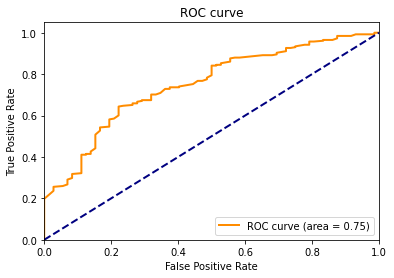

In [79]:
print_roc(y_test, predictions)